
# Um exemplo de notebook de aprendizado de máquina

## Introdução


Neste bloco de notas, examinaremos um pipeline básico de análise de dados Python do início ao fim para mostrar como é um fluxo de trabalho típico de ciência de dados.


## Bibliotecas necessárias

Se você não tem Python em seu computador, você pode usar a [distribuição Anaconda Python] (http://continuum.io/downloads) para instalar a maioria dos pacotes Python que você precisa. O Anaconda fornece um instalador simples de clique duplo para sua conveniência.

Este notebook usa vários pacotes Python que vêm como padrão com a distribuição Anaconda Python. As principais bibliotecas que usaremos são:

* **NumPy**: Fornece uma estrutura de matriz numérica rápida e funções auxiliares.
* **pandas**: Fornece uma estrutura DataFrame para armazenar dados na memória e trabalhar com eles de forma fácil e eficiente.
* **scikit-learn**: O pacote essencial de aprendizado de máquina em Python.
* **matplotlib**: Biblioteca básica de plotagem em Python; a maioria das outras bibliotecas de plotagem Python são construídas sobre ele.
* **Seaborn**: Biblioteca de plotagem estatística avançada.
* **watermark**: Uma extensão do Jupyter Notebook para imprimir timestamps, números de versão e informações de hardware.


Para ter certeza de que possui todos os pacotes de que precisa, instale-os com `pip`:

    pip install numpy pandas scikit-learn matplotlib seaborn watermark
    

O `pip` pode solicitar que você atualize alguns deles se você não tiver a versão mais recente. Permita que isso aconteça.

## O domínio do problema

Para os fins deste exercício, vamos fingir que estamos trabalhando para uma startup que acabou de ser financiada para criar um aplicativo para smartphone que identifica automaticamente espécies de flores a partir de fotos tiradas no smartphone. Estamos trabalhando com uma equipe de cientistas de dados de tamanho moderado e construiremos parte do pipeline de análise de dados para este aplicativo.

Fomos incumbidos pelo chefe de ciência de dados de nossa empresa de criar um modelo de aprendizado de máquina de demonstração que tira quatro medidas das flores (comprimento da sépala, largura da sépala, comprimento da pétala e largura da pétala) e identifica as espécies com base apenas nessas medidas.

<img src = "../images/petal_sepal.jpg" />

Recebemos um [conjunto de dados] (https://github.com/rhiever/Data-Analysis-and-Machine-Learning-Projects/raw/master/example-data-science-notebook/iris-data.csv ) de nossos pesquisadores de campo para desenvolver a demonstração, que inclui apenas medições para três tipos de flores * Iris *:

### * Iris setosa *

<img src = "../images/iris_setosa.jpg" />

### * Iris versicolor *
<img src = "../images/iris_versicolor.jpg" />

### * Iris virginica *
<img src = "../images/iris_virginica.jpg" />

As quatro medições que usamos atualmente vêm de medições feitas à mão pelos pesquisadores de campo, mas serão automaticamente medidas por um modelo de processamento de imagem no futuro.

** Observação: ** O conjunto de dados com o qual estamos trabalhando é o famoso [* conjunto de dados Iris *] (https://archive.ics.uci.edu/ml/datasets/Iris) - incluído neste bloco de notas mas que foi alterado para fins de demonstração.



## Etapa 1: Respondendo à pergunta


A primeira etapa para qualquer projeto de análise de dados é definir a questão ou problema que estamos procurando resolver e definir uma medida (ou conjunto de medidas) para nosso sucesso em resolver essa tarefa. A lista de verificação de análise de dados nos permite responder a um punhado de perguntas para fazer isso, então vamos trabalhar com essas perguntas.

> Você especificou o tipo de pergunta analítica de dados (por exemplo, exploração, causalidade de associação) antes de tocar nos dados?

Estamos tentando classificar as espécies (ou seja, classe) da flor com base em quatro medidas que nos são fornecidas: comprimento da sépala, largura da sépala, comprimento da pétala e largura da pétala.

> Você definiu a métrica de sucesso antes de começar?

Vamos fazer isso agora. Como estamos realizando a classificação, podemos usar [precisão] (https://en.wikipedia.org/wiki/Accuracy_and_precision) - a fração de flores classificadas corretamente - para quantificar o desempenho do nosso modelo. O chefe de dados da nossa empresa nos disse que devemos atingir pelo menos 90% de precisão.

> Você entendeu o contexto da pergunta e a aplicação científica ou comercial?

Estamos construindo parte de um pipeline de análise de dados para um aplicativo de smartphone que será capaz de classificar as espécies de flores a partir de fotos tiradas no smartphone. No futuro, este pipeline será conectado a outro pipeline que mede automaticamente a partir de imagens as características que estamos usando para realizar essa classificação.

> Você gravou o projeto experimental?

O chefe de dados de nossa empresa nos disse que os pesquisadores de campo estão medindo manualmente 50 flores amostradas aleatoriamente de cada espécie usando uma metodologia padronizada. Os pesquisadores de campo tiram fotos de cada flor que eles coletam em ângulos pré-definidos para que as medidas e espécies possam ser confirmadas pelos outros pesquisadores de campo posteriormente. No final de cada dia, os dados são compilados e armazenados em um repositório GitHub de uma empresa privada.

> Você considerou se a pergunta poderia ser respondida com os dados disponíveis?

O conjunto de dados que temos atualmente é apenas para três tipos de flores *Iris*. O modelo construído a partir desse conjunto de dados funcionará apenas para aquelas flores *Iris*, portanto, precisaremos de mais dados para criar um classificador de flores geral.

<hr />

Observe que passamos um bom tempo trabalhando no problema sem escrever uma linha de código ou mesmo olhar os dados.

**Pensar e documentar o problema em que estamos trabalhando é uma etapa importante para realizar uma análise de dados eficaz que geralmente passa despercebida.** Não pule.



## Etapa 2: Verificar os dados

A próxima etapa é examinar os dados com os quais estamos trabalhando. Mesmo conjuntos de dados selecionados pelo governo podem conter erros e é vital que identifiquemos esses erros antes de investir muito tempo em nossa análise.

Geralmente, procuramos responder às seguintes perguntas:

Há algo de errado com os dados?
Há alguma peculiaridade com os dados?
Eu preciso corrigir ou remover algum dos dados?
Vamos começar lendo os dados em um DataFrame do pandas.


In [1]:
import pandas as pd

iris_data = pd.read_csv('../data/iris-data.csv')
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Estamos com sorte! Os dados parecem estar em um formato utilizável.

A primeira linha do arquivo de dados define os cabeçalhos das colunas, e os cabeçalhos são descritivos o suficiente para que possamos entender o que cada coluna representa. Os cabeçalhos fornecem até mesmo as unidades em que as medições foram registradas, caso precisássemos saber em um ponto posterior do projeto.

Cada linha após a primeira linha representa uma entrada para uma flor: quatro medidas e uma classe, que nos diz a espécie da flor.

**Uma das primeiras coisas que devemos procurar são os dados ausentes.** Felizmente, os pesquisadores de campo já nos disseram que colocaram um 'NA' na planilha quando estavam faltando uma medição.

Podemos dizer aos pandas para identificarem automaticamente os valores ausentes se conhecerem nosso marcador de valor ausente.

In [2]:
iris_data = pd.read_csv('../data/iris-data.csv', na_values=['NA'])

Pronto! Agora o pandas sabe como tratar as linhas com 'NA' como valores ausentes.

Em seguida, é sempre uma boa ideia observar a distribuição de nossos dados - especialmente os outliers.

Vamos começar imprimindo algumas estatísticas resumidas sobre o conjunto de dados.

In [3]:
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Podemos ver vários valores úteis nesta tabela. Por exemplo, vemos que cinco entradas `petal_width_cm` estão faltando.

Se você me perguntar, no entanto, tabelas como essa raramente são úteis, a menos que saibamos que nossos dados devem estar em um determinado intervalo. Geralmente é melhor visualizar os dados de alguma forma. A visualização faz com que os valores discrepantes e os erros se destaquem imediatamente, ao passo que podem passar despercebidos em uma grande tabela de números.

Já que sabemos que vamos traçar nesta seção, vamos configurar o notebook para que possamos traçar dentro dele.

In [4]:
# Esta linha diz ao notebook para mostrar plotagens dentro do notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

A seguir, vamos criar uma **matriz de gráfico de dispersão**. As matrizes de gráfico de dispersão representam a distribuição de cada coluna ao longo da diagonal e, em seguida, representam uma matriz de gráfico de dispersão para a combinação de cada variável. Eles são uma ferramenta eficiente para procurar erros em nossos dados.

Podemos até ter o pacote de plotagem com a cor de cada entrada de sua classe para procurar tendências dentro das classes.

/home/tnascimn/.anaconda3/envs/iris/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/tnascimn/.anaconda3/envs/iris/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/tnascimn/.anaconda3/envs/iris/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/tnascimn/.anaconda3/envs/iris/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


''

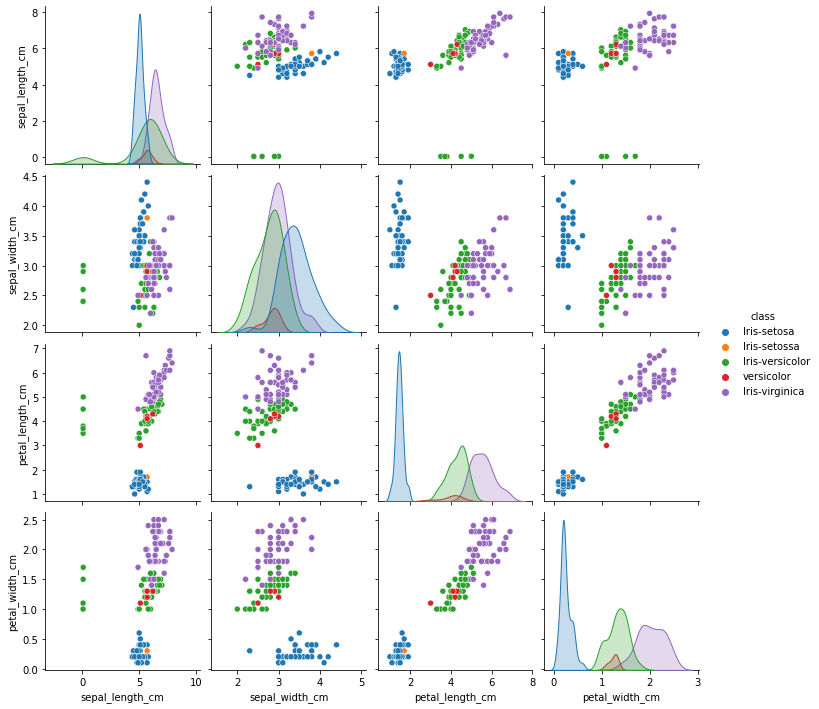

In [5]:
# Temos que descartar temporariamente as linhas com valores 'NA'
# porque a função de plotagem Seaborn não sabe
# o que fazer com eles

sb.pairplot(iris_data.dropna(), hue='class')
;

Na matriz do gráfico de dispersão, já podemos ver alguns problemas com o conjunto de dados:

1. Existem cinco classes quando deveria haver apenas três, o que significa que houve alguns erros de codificação.

2. Existem alguns outliers claros nas medições que podem estar errados: uma entrada `sepal_width_cm` para` Iris-setosa` está bem fora de sua faixa normal, e várias entradas `sepal_length_cm` para` Iris-versicolor` são quase zero para alguma razão.

3. Tivemos que descartar essas linhas com valores ausentes.

Em todos esses casos, precisamos descobrir o que fazer com os dados errados. O que nos leva à próxima etapa ...

## Etapa 3: Organizando os dados

Agora que identificamos vários erros no conjunto de dados, precisamos corrigi-los antes de prosseguirmos com a análise.

Vamos examinar os problemas um por um.

> Existem cinco classes quando deveria haver apenas três, o que significa que houve alguns erros de codificação.

Depois de conversar com os pesquisadores de campo, parece que um deles se esqueceu de adicionar `Iris-` antes de suas entradas `Iris-versicolor`. A outra classe estranha, `Iris-setossa`, era simplesmente um erro de digitação que eles se esqueceram de corrigir.

Vamos usar o DataFrame para corrigir esses erros.

In [6]:
iris_data.loc[iris_data['class'] == 'versicolor', 'class'] = 'Iris-versicolor'
iris_data.loc[iris_data['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'

iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Muito melhor! Agora, temos apenas três tipos de classes. Imagine como seria embaraçoso criar um modelo que usasse as classes erradas.

> Existem alguns outliers claros nas medições que podem estar errados: uma entrada `sepal_width_cm` para` Iris-setosa` está bem fora de sua faixa normal, e várias entradas `sepal_length_cm` para` Iris-versicolor` são quase zero para alguns razão.

Consertar valores discrepantes pode ser um negócio complicado. Raramente fica claro se o outlier foi causado por erro de medição, registro de dados em unidades inadequadas ou se o outlier é uma anomalia real. Por esse motivo, devemos ser criteriosos ao trabalhar com outliers: se decidirmos excluir quaisquer dados, precisamos ter certeza de documentar quais dados excluímos e fornecer um raciocínio sólido para excluir esses dados. (ou seja, "Esses dados não se encaixam na minha hipótese" não suportará a revisão por pares.)

No caso de uma entrada anômala para `Iris-setosa`, digamos que nossos pesquisadores de campo saibam que é impossível para` Iris-setosa` ter sépalas com largura inferior a 2,5 cm. Obviamente, essa entrada foi feita por engano, e é melhor apenas descartá-la do que gastar horas descobrindo o que aconteceu.

''

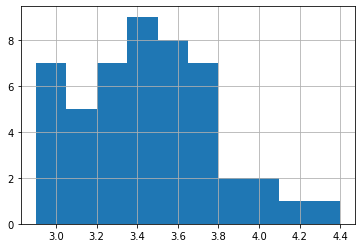

In [7]:
# Esta linha elimina quaisquer linhas 'Iris-setosa' com uma sepal_width inferior a 2,5 cm

iris_data = iris_data.loc[(iris_data['class'] != 'Iris-setosa') | (iris_data['sepal_width_cm'] >= 2.5)]
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'sepal_width_cm'].hist()
;

Excelente! Agora, todas as nossas linhas `Iris-setosa` têm uma largura sépala maior que 2,5.

O próximo problema de dados a ser resolvido são os vários comprimentos de sépalas quase zero para as linhas `Iris-versicolor`. Vamos dar uma olhada nessas linhas.

In [8]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
              (iris_data['sepal_length_cm'] < 1.0)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


Que tal isso? Todas essas entradas de `sepal_length_cm` quase zero parecem estar erradas em duas ordens de magnitude, como se tivessem sido registradas em metros em vez de centímetros.

Após uma breve correspondência com os pesquisadores de campo, descobrimos que um deles se esqueceu de converter essas medidas para centímetros. Vamos fazer isso por eles.

''

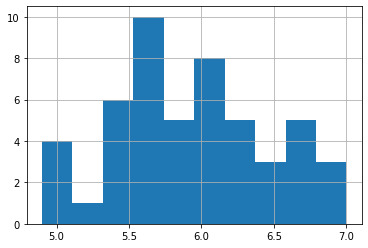

In [9]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
              (iris_data['sepal_length_cm'] < 1.0),
              'sepal_length_cm'] *= 100.0

iris_data.loc[iris_data['class'] == 'Iris-versicolor', 'sepal_length_cm'].hist()
;

Ufa! Ainda bem que corrigimos esses outliers. Eles poderiam realmente ter jogado nossa análise fora.

> Tivemos que descartar essas linhas com valores ausentes.

Vamos dar uma olhada nas linhas com valores ausentes:

In [10]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


Não é ideal que tenhamos que descartar essas linhas, especialmente considerando que são todas entradas `Iris-setosa`. Uma vez que parece que os dados ausentes são sistemáticos - todos os valores ausentes estão na mesma coluna para o mesmo tipo * Iris * - esse erro pode afetar nossa análise.

Uma maneira de lidar com dados perdidos é **imputação média**: Se sabemos que os valores de uma medição caem em um determinado intervalo, podemos preencher os valores vazios com a média dessa medição.

Vamos ver se podemos fazer isso aqui.

''

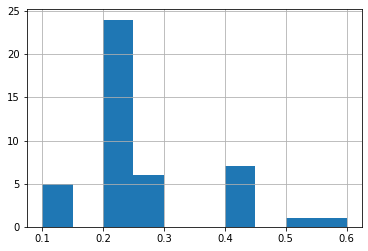

In [11]:
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].hist()
;

A maioria das larguras das pétalas para `Iris-setosa` está dentro da faixa de 0,2-0,3, então vamos preencher essas entradas com a largura média medida da pétala.

In [12]:
average_petal_width = iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].mean()
average_petal_width

0.24999999999999997

In [13]:
average_petal_width = iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].mean()

iris_data.loc[(iris_data['class'] == 'Iris-setosa') &
              (iris_data['petal_width_cm'].isnull()),
              'petal_width_cm'] = average_petal_width

iris_data.loc[(iris_data['class'] == 'Iris-setosa') &
              (iris_data['petal_width_cm'] == average_petal_width)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,0.25,Iris-setosa
8,4.4,2.9,1.4,0.25,Iris-setosa
9,4.9,3.1,1.5,0.25,Iris-setosa
10,5.4,3.7,1.5,0.25,Iris-setosa
11,4.8,3.4,1.6,0.25,Iris-setosa


In [14]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


Ótimo! Agora, recuperamos essas linhas e não temos mais dados ausentes em nosso conjunto de dados.

**Observação:** se você não se sentir confortável em imputar seus dados, pode descartar todas as linhas com dados ausentes com a chamada `dropna ()`:

    iris_data.dropna(inplace = True)

Depois de todo esse trabalho duro, não queremos repetir esse processo toda vez que trabalharmos com o conjunto de dados. Vamos salvar o arquivo de dados organizado *como um arquivo separado* e trabalhar diretamente com esse arquivo de dados a partir de agora.

In [15]:
iris_data.to_csv('../data/iris-data-clean.csv', index=False)

iris_data_clean = pd.read_csv('../data/iris-data-clean.csv')

Agora, vamos dar uma olhada na matriz do gráfico de dispersão, agora que organizamos os dados.

''

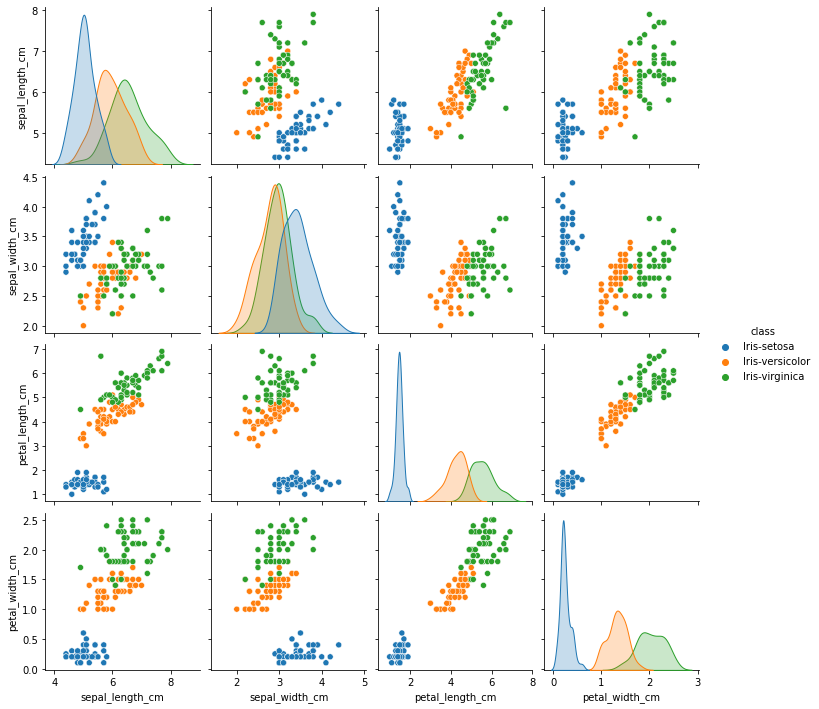

In [16]:
sb.pairplot(iris_data_clean, hue='class')
;

Vários erros neste conjunto de dados foram inseridos propositalmente para demonstrar alguns dos muitos cenários possíveis que você pode enfrentar ao organizar seus dados.

As conclusões gerais aqui devem ser:

* Certifique-se de que seus dados estão codificados corretamente

* Certifique-se de que seus dados estejam dentro da faixa esperada e use o conhecimento do domínio sempre que possível para definir essa faixa esperada

* Lide com os dados ausentes de uma forma ou de outra: substitua-os se puder ou elimine-os

* Nunca organize seus dados manualmente porque não são facilmente reproduzíveis

* Use o código como um registro de como você organizou seus dados

* Plote tudo o que puder sobre os dados nesta fase da análise para que possa * visualmente * confirmar se tudo parece correto

## Bônus: Testando nossos dados

Da mesma forma como usamos testes de unidade para verificar nossas expectativas do código, podemos configurar testes de unidade de maneira semelhante para verificar nossas expectativas sobre um conjunto de dados.

Podemos testar rapidamente nossos dados usando declarações `assert`: afirmamos que algo deve ser verdade e, se for, nada acontece e o notebook continua em execução. No entanto, se nossa afirmação estiver errada, o notebook para de funcionar e nos chama a atenção. Por exemplo,

```Python
afirmar 1 == 2
```

irá gerar um `AssertionError` e interromper a execução do bloco de notas porque a declaração falhou.

Vamos testar algumas coisas que sabemos sobre nosso conjunto de dados agora.

In [17]:
# Sabemos que devemos ter apenas três classes
assert len(iris_data_clean['class'].unique()) == 3

In [18]:
# Sabemos que o comprimento das sépalas para 'Iris-versicolor' nunca deve ser inferior a 2,5 cm
assert iris_data_clean.loc[iris_data_clean['class'] == 'Iris-versicolor', 'sepal_length_cm'].min() >= 2.5

In [19]:
# Sabemos que nosso conjunto de dados não deve ter medições ausentes
assert len(iris_data_clean.loc[(iris_data_clean['sepal_length_cm'].isnull()) |
                               (iris_data_clean['sepal_width_cm'].isnull()) |
                               (iris_data_clean['petal_length_cm'].isnull()) |
                               (iris_data_clean['petal_width_cm'].isnull())]) == 0

E assim por diante. Se alguma dessas expectativas for violada, nossa análise será interrompida imediatamente e teremos que retornar ao estágio de limpeza.

## Etapa 4: Análise exploratória

Agora, depois de gastar muito tempo organizando nossos dados, podemos começar a analisá-los!

A análise exploratória é a etapa em que começamos a nos aprofundar no conjunto de dados, além dos outliers e erros. Estaremos procurando responder a perguntas como:

* Como meus dados são distribuídos?

* Existem correlações em meus dados?

* Existem fatores de confusão que explicam essas correlações?

Este é o estágio em que plotamos todos os dados de tantas maneiras quanto possível. Crie muitos gráficos, mas não se preocupe em torná-los bonitos - esses gráficos são para uso interno.

Voltemos à matriz do gráfico de dispersão que usamos anteriormente.

''

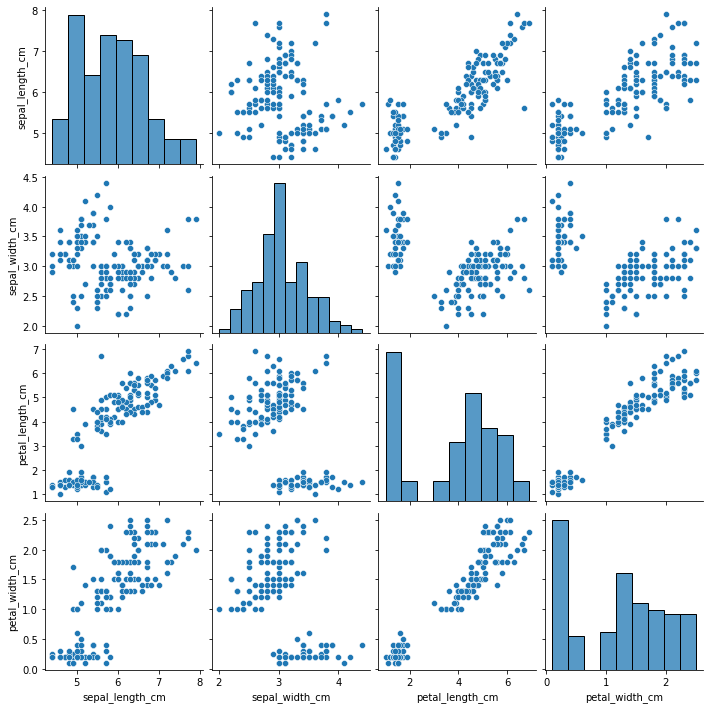

In [20]:
sb.pairplot(iris_data_clean)
;

Nossos dados são normalmente distribuídos em sua maior parte, o que é uma ótima notícia se planejamos usar qualquer método de modelagem que presuma que os dados são normalmente distribuídos.

Há algo estranho acontecendo com as medidas das pétalas. Talvez tenha algo a ver com os diferentes tipos de `Iris`. Vamos codificar os dados com cores pela classe novamente para ver se isso esclarece as coisas.

''

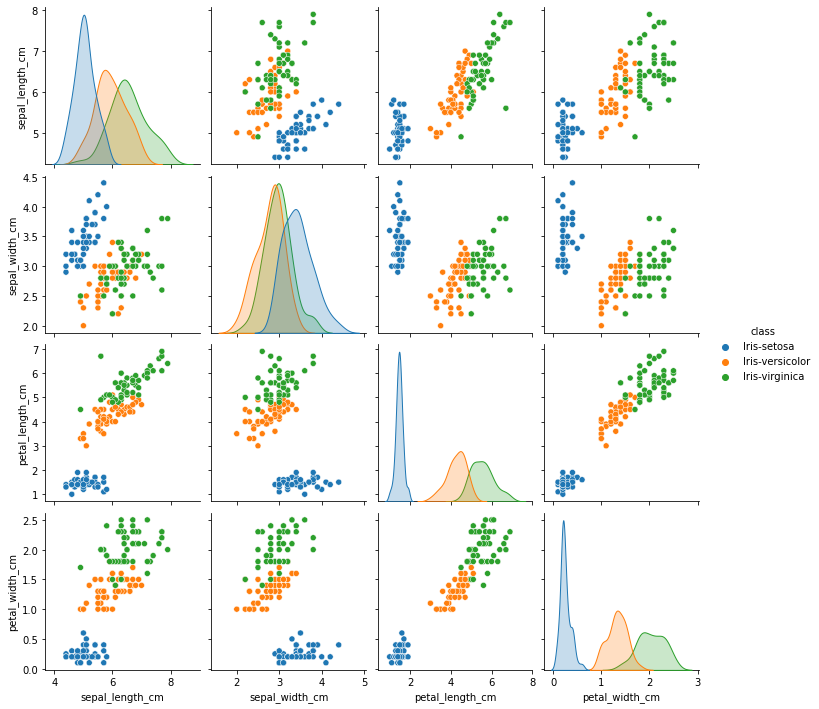

In [21]:
sb.pairplot(iris_data_clean, hue='class')
;


Com certeza, a estranha distribuição das medidas das pétalas existe por causa das diferentes espécies. Na verdade, esta é uma ótima notícia para nossa tarefa de classificação, pois significa que as medidas das pétalas tornarão mais fácil distinguir entre `Iris-setosa` e os outros tipos de` Iris`.

Distinguir `Iris-versicolor` e` Iris-virginica` será mais difícil, dado o quanto suas medidas se sobrepõem.

Existem também correlações entre o comprimento e a largura da pétala, bem como o comprimento e a largura da sépala. Os biólogos de campo garantem que isso é esperado: pétalas de flores mais longas também tendem a ser mais largas, e o mesmo se aplica às sépalas.

Também podemos fazer **plotagens de violino** dos dados para comparar as distribuições de medição das classes. Os gráficos de violino contêm as mesmas informações que os [gráficos de caixa] (https://en.wikipedia.org/wiki/Box_plot), mas também dimensionam a caixa de acordo com a densidade dos dados.

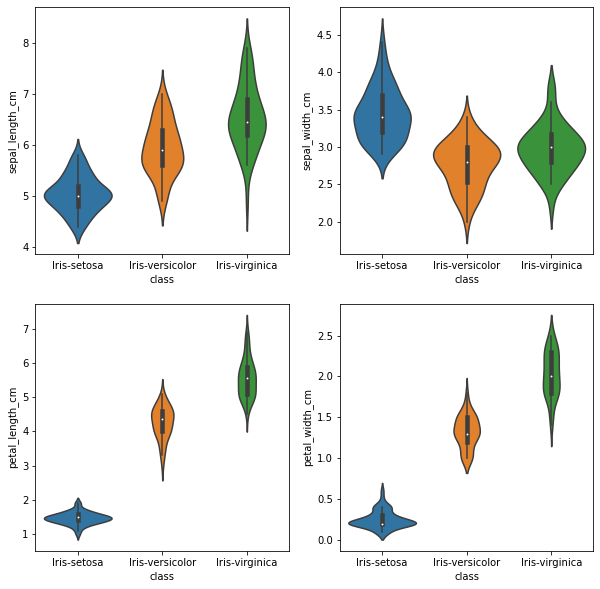

In [22]:
plt.figure(figsize=(10, 10))

for column_index, column in enumerate(iris_data_clean.columns):
    if column == 'class':
        continue
    plt.subplot(2, 2, column_index + 1)
    sb.violinplot(x='class', y=column, data=iris_data_clean)

Chega de flertar com os dados. Vamos começar a modelar.

## Etapa 5: Classificação

Todo esse trabalho e nós *ainda* não modelamos os dados!

Por mais cansativo que possa ser, organizar e explorar nossos dados é um componente vital para qualquer análise de dados. Se tivéssemos pulado direto para a etapa de modelagem, teríamos criado um modelo de classificação com defeito.

Lembre-se: **Dados ruins levam a modelos ruins.** Sempre verifique seus dados primeiro.

<hr />

Com a certeza de que nossos dados estão tão limpos quanto podemos torná-los - e munidos de algum conhecimento superficial das distribuições e relações em nosso conjunto de dados - é hora de dar o próximo grande passo em nossa análise: dividir os dados em conjuntos de treinamento e teste .

Um **conjunto de treinamento** é um subconjunto aleatório dos dados que usamos para treinar nossos modelos.

Um **conjunto de teste** é um subconjunto aleatório dos dados (mutuamente exclusivo do conjunto de treinamento) que usamos para validar nossos modelos em dados imprevistos.

Especialmente em conjuntos de dados esparsos como o nosso, é fácil para os modelos **super ajustar** os dados (overfitting): o modelo aprenderá o conjunto de treinamento tão bem que não será capaz de lidar com a maioria dos casos que nunca viu antes. É por isso que é importante construirmos o modelo com o conjunto de treinamento, mas pontuá-lo com o conjunto de teste.

Observe que, uma vez que dividimos os dados em um conjunto de treinamento e teste, devemos tratar o conjunto de teste como se ele não existisse mais: não podemos usar nenhuma informação do conjunto de teste para construir nosso modelo, senão estaremos trapaceando.

Vamos configurar nossos dados primeiro.

In [23]:
iris_data_clean = pd.read_csv('../data/iris-data-clean.csv')

# Estamos usando todas as quatro medições como entradas
# Observe que o scikit-learn espera que cada entrada seja uma lista de valores, por exemplo,
# [[val1, val2, val3],
# [val1, val2, val3],
# ...]
# de modo que nosso conjunto de dados de entrada seja representado como uma lista de listas

# Podemos extrair os dados neste formato de pandas assim:
all_inputs = iris_data_clean[['sepal_length_cm', 'sepal_width_cm',
                             'petal_length_cm', 'petal_width_cm']].values


# Da mesma forma, podemos extrair os rótulos das classes
all_labels = iris_data_clean['class'].values


# Certifique-se de não confundir a ordem das entradas
# all_inputs [5] entradas devem corresponder à classe em all_labels [5]

# Esta é a aparência de um subconjunto de nossas entradas:
all_inputs[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

Agora nossos dados estão prontos para serem divididos.

In [24]:
from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

Com nossa divisão de dados, podemos começar a ajustar modelos aos nossos dados. O chefe de dados de nossa empresa trata de classificadores de árvore de decisão, então vamos começar com um deles.

Os classificadores de árvore de decisão são incrivelmente simples na teoria. Em sua forma mais simples, os classificadores da árvore de decisão fazem uma série de perguntas Sim / Não sobre os dados - cada vez mais perto de descobrir a classe de cada entrada - até que classifiquem o conjunto de dados perfeitamente ou simplesmente não consigam diferenciar um conjunto de entradas.

Aqui está um exemplo de classificador de árvore de decisão:

<img src = "iris_dtc.png" />

Observe como o classificador faz perguntas Sim / Não sobre os dados - se um determinado recurso é <= 1,75, por exemplo - para que ele possa diferenciar os registros. Esta é a essência de toda árvore de decisão.

A parte boa sobre os classificadores de árvore de decisão é que eles são **invariantes em escala**, ou seja, a escala dos recursos não afeta seu desempenho, ao contrário de muitos modelos de aprendizado de máquina. Em outras palavras, não importa se nossos recursos variam de 0 a 1 ou 0 a 1.000; Os classificadores de árvore de decisão funcionarão com eles da mesma forma.

Existem vários [parâmetros] (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) que podemos ajustar para classificadores de árvore de decisão, mas por agora vamos usar um classificador de árvore de decisão básico .

In [25]:
from sklearn.tree import DecisionTreeClassifier

# CCria o classificador
decision_tree_classifier = DecisionTreeClassifier()

# Treina o classificador no conjunto de treino
decision_tree_classifier.fit(training_inputs, training_classes)

# Valida o classificador no conjunto de teste usando a precisão da classificação
decision_tree_classifier.score(testing_inputs, testing_classes)

0.9736842105263158

Impressionante! Nosso modelo atinge 97% de precisão de classificação sem muito esforço.

Antes de seguir a análise, vamos aproveitar para salvar o nosso modelo:

In [36]:
import pickle as pk
with open('../model/decision_tree.pkl', 'wb') as fp:
    pk.dump(decision_tree_classifier, fp)

In [ ]:
No entanto, há um problema: dependendo de como nosso conjunto de treinamento e teste foi amostrado, nosso modelo pode atingir de 80% a 100% de precisão:

''

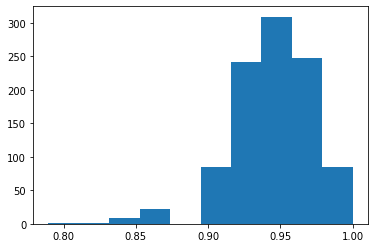

In [26]:
model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
plt.hist(model_accuracies)
;

Obviamente, é um problema cujo desempenho de nosso modelo é bem diferente, dependendo do subconjunto de dados em que é treinado. Esse fenômeno é conhecido como **overfitting**: o modelo está aprendendo a classificar o conjunto de treinamento tão bem que não generaliza e tem um bom desempenho em dados que não tinha visto antes.

### Validação cruzada

Este problema é o principal motivo pelo qual a maioria dos cientistas de dados realiza ***k*-fold cross-validation** em seus modelos: Divida o conjunto de dados original em *k* subconjuntos, use um dos subconjuntos como o conjunto de teste e o o resto dos subconjuntos são usados como o conjunto de treinamento. Esse processo é então repetido *k* vezes, de forma que cada subconjunto seja usado como o conjunto de teste exatamente uma vez.

A validação cruzada de 10 vezes é a escolha mais comum, então vamos usá-la aqui. A realização de uma validação cruzada de 10 vezes em nosso conjunto de dados se parece com isto:

(cada quadrado é uma entrada em nosso conjunto de dados)

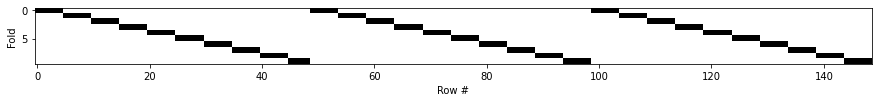

In [27]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

def plot_cv(cv, features, labels):
    masks = []
    for train, test in cv.split(features, labels):
        mask = np.zeros(len(labels), dtype=bool)
        mask[test] = 1
        masks.append(mask)
    
    plt.figure(figsize=(15, 15))
    plt.imshow(masks, interpolation='none', cmap='gray_r')
    plt.ylabel('Fold')
    plt.xlabel('Row #')

plot_cv(StratifiedKFold(n_splits=10), all_inputs, all_labels)

You'll notice that we used **Stratified *k*-fold cross-validation** in the code above. Stratified *k*-fold keeps the class proportions the same across all of the folds, which is vital for maintaining a representative subset of our data set. (e.g., so we don't have 100% `Iris setosa` entries in one of the folds.)

We can perform 10-fold cross-validation on our model with the following code:

''

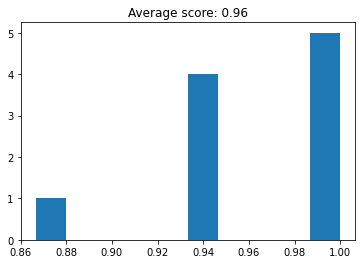

In [28]:
from sklearn.model_selection import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
;


Agora temos uma classificação muito mais consistente da precisão da classificação geral do nosso classificador.

### Ajuste de parâmetro

Cada modelo de aprendizado de máquina vem com uma variedade de parâmetros para ajustar, e esses parâmetros podem ser de vital importância para o desempenho de nosso classificador. Por exemplo, se limitarmos severamente a profundidade de nosso classificador de árvore de decisão:

''

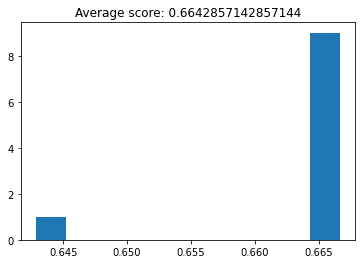

In [29]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=1)

cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
;

a precisão da classificação cai tremendamente.

Portanto, precisamos encontrar um método sistemático para descobrir os melhores parâmetros para nosso modelo e conjunto de dados.

O método mais comum para ajuste dos parâmetros do modelo é **Pesquisa de grade**. A ideia por trás do Grid Search é simples: explore uma variedade de parâmetros e encontre a combinação de parâmetros de melhor desempenho. Concentre sua pesquisa na melhor faixa de parâmetros e repita esse processo várias vezes até que os melhores parâmetros sejam descobertos.

Vamos ajustar nosso classificador de árvore de decisão. Vamos nos ater a apenas dois parâmetros por enquanto, mas é possível explorar simultaneamente dezenas de parâmetros, se quisermos.

In [30]:
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.96
Best parameters: {'max_depth': 3, 'max_features': 4}


Agora vamos visualizar a pesquisa da grade para ver como os parâmetros interagem.

''

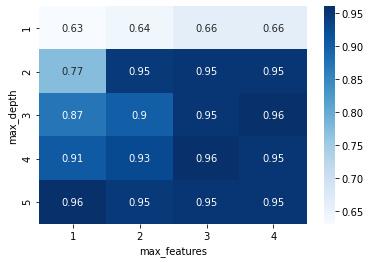

In [31]:
grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (5, 4)
sb.heatmap(grid_visualization, cmap='Blues', annot=True)
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'])
plt.xlabel('max_features')
plt.ylabel('max_depth')
;

Agora temos uma noção melhor do espaço de parâmetros: sabemos que precisamos de uma `max_depth` de pelo menos 2 para permitir que a árvore de decisão tome mais do que uma decisão única.

`max_features` realmente não parece fazer uma grande diferença aqui, contanto que tenhamos 2 deles, o que faz sentido já que nosso conjunto de dados tem apenas 4 recursos e é relativamente fácil de classificar. (Lembre-se de que uma das classes do nosso conjunto de dados era facilmente separável do resto com base em um único recurso.)

Vamos seguir em frente e usar uma ampla pesquisa em grade para encontrar as melhores configurações para um punhado de parâmetros.

In [32]:
decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.96
Best parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'splitter': 'best'}


Agora podemos pegar o melhor classificador do Grid Search e usá-lo:

In [33]:
decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier

DecisionTreeClassifier(max_depth=3, max_features=3)

Podemos até visualizar a árvore de decisão com [GraphViz] (http://www.graphviz.org/) para ver como está fazendo as classificações:

In [34]:
import sklearn.tree as tree
from six import StringIO

with open('../images/iris_dtc.dot', 'w') as out_file:
    out_file = tree.export_graphviz(decision_tree_classifier, out_file=out_file)

<img src="../images/iris_dtc.png" />

(Este classificador pode parecer familiar no início do bloco de notas.)

Tudo bem! Finalmente temos nosso classificador de demonstração. Vamos criar alguns visuais de seu desempenho para que tenhamos algo para mostrar ao chefe de dados de nossa empresa.

/home/tnascimn/.anaconda3/envs/iris/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/tnascimn/.anaconda3/envs/iris/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


''

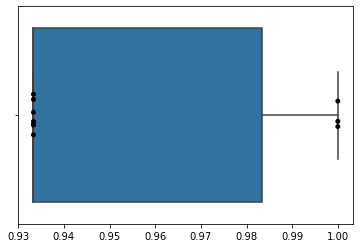

In [35]:
dt_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)

sb.boxplot(dt_scores)
sb.stripplot(dt_scores, jitter=True, color='black')
;

Hmmm ... isso é um pouco chato por si só. Que tal compararmos outro classificador para ver como eles se saem?

Já sabemos de projetos anteriores que os classificadores Random Forest geralmente funcionam melhor do que árvores de decisão individuais. Um problema comum que as árvores de decisão enfrentam é que elas são propensas a overfitting: elas complexificam a ponto de classificar o conjunto de treinamento quase perfeitamente, mas falham ao generalizar para dados que não tenham visto antes.

**Classificadores de floresta aleatória** contornam essa limitação criando um monte de árvores de decisão (daí "floresta") - cada uma treinada em subconjuntos aleatórios de amostras de treinamento (desenhados com substituição) e recursos (desenhados sem substituição) - e têm o as árvores de decisão trabalham juntas para fazer uma classificação mais precisa.

Deixe que isso sirva de lição para nós: **Mesmo no aprendizado de máquina, obtemos melhores resultados quando trabalhamos juntos!**

Vamos ver se um classificador Random Forest funciona melhor aqui.

A grande parte do scikit-learn é que o processo de treinamento, teste, ajuste de parâmetros, etc. é o mesmo para todos os modelos, portanto, só precisamos conectar o novo classificador.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()

parameter_grid = {'n_estimators': [10, 25, 50, 100],
                  'criterion': ['gini', 'entropy'],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(random_forest_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

Agora podemos comparar seu desempenho:

In [ ]:
random_forest_classifier = grid_search.best_estimator_

rf_df = pd.DataFrame({'accuracy': cross_val_score(random_forest_classifier, all_inputs, all_labels, cv=10),
                       'classifier': ['Random Forest'] * 10})
dt_df = pd.DataFrame({'accuracy': cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10),
                      'classifier': ['Decision Tree'] * 10})
both_df = rf_df.append(dt_df)

sb.boxplot(x='classifier', y='accuracy', data=both_df)
sb.stripplot(x='classifier', y='accuracy', data=both_df, jitter=True, color='black')
;

Que tal isso? Ambos parecem ter o mesmo desempenho neste conjunto de dados. Provavelmente, isso se deve às limitações de nosso conjunto de dados: temos apenas 4 recursos para fazer a classificação, e os classificadores Random Forest se destacam quando há centenas de recursos possíveis para serem examinados. Em outras palavras, não havia muito espaço para melhorias com esse conjunto de dados.

## Etapa 6: Reprodutibilidade

[[voltar ao topo]] (# Índice)

Garantir que nosso trabalho seja reproduzível é a última e - sem dúvida - a mais importante etapa em qualquer análise. **Como regra, não devemos dar muito peso a uma descoberta que não pode ser reproduzida**. Sendo assim, se nossa análise não for reproduzível, poderíamos muito bem não ter feito isso.

Notebooks como este ajudam muito a tornar nosso trabalho reproduzível. Como documentamos cada etapa à medida que avançamos, temos um registro escrito do que fizemos e por que o fizemos - tanto em texto quanto em código.

Além de registrar o que fizemos, devemos também documentar qual software e hardware usamos para realizar nossa análise. Isso normalmente fica na parte superior de nossos blocos de notas para que nossos leitores saibam quais ferramentas usar.

[Sebastian Raschka] (http://sebastianraschka.com/) criou uma [ferramenta de caderno] útil (https://github.com/rasbt/watermark) para isso:

In [ ]:
%load_ext watermark
%watermark -a 'Randal S. Olson' -nmv --packages numpy,pandas,sklearn,matplotlib,seaborn

Por fim, vamos extrair o núcleo do nosso trabalho das etapas 1 a 5 e transformá-lo em um único pipeline.

In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# We can jump directly to working with the clean data because we saved our cleaned data set
iris_data_clean = pd.read_csv('iris-data-clean.csv')

# Testing our data: Our analysis will stop here if any of these assertions are wrong

# We know that we should only have three classes
assert len(iris_data_clean['class'].unique()) == 3

# We know that sepal lengths for 'Iris-versicolor' should never be below 2.5 cm
assert iris_data_clean.loc[iris_data_clean['class'] == 'Iris-versicolor', 'sepal_length_cm'].min() >= 2.5

# We know that our data set should have no missing measurements
assert len(iris_data_clean.loc[(iris_data_clean['sepal_length_cm'].isnull()) |
                               (iris_data_clean['sepal_width_cm'].isnull()) |
                               (iris_data_clean['petal_length_cm'].isnull()) |
                               (iris_data_clean['petal_width_cm'].isnull())]) == 0

all_inputs = iris_data_clean[['sepal_length_cm', 'sepal_width_cm',
                             'petal_length_cm', 'petal_width_cm']].values

all_labels = iris_data_clean['class'].values

# This is the classifier that came out of Grid Search
random_forest_classifier = RandomForestClassifier(criterion='gini', max_features=3, n_estimators=50)

# All that's left to do now is plot the cross-validation scores
rf_classifier_scores = cross_val_score(random_forest_classifier, all_inputs, all_labels, cv=10)
sb.boxplot(rf_classifier_scores)
sb.stripplot(rf_classifier_scores, jitter=True, color='black')

# ...and show some of the predictions from the classifier
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)

random_forest_classifier.fit(training_inputs, training_classes)

for input_features, prediction, actual in zip(testing_inputs[:10],
                                              random_forest_classifier.predict(testing_inputs[:10]),
                                              testing_classes[:10]):
    print('{}\t-->\t{}\t(Actual: {})'.format(input_features, prediction, actual))

Aí está: temos um pipeline de aprendizado de máquina completo e reproduzível para demonstração para o chefe de dados de nossa empresa. Atendemos aos critérios de sucesso que definimos desde o início (> 90% de precisão), e nosso pipeline é flexível o suficiente para lidar com novas entradas ou flores quando o conjunto de dados estiver pronto. Nada mal para nossa primeira semana de trabalho!

## Fonte:

Traduzido e adaptado de https://github.com/rhiever/Data-Analysis-and-Machine-Learning-Projects